In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

In [2]:
import numpy as np                   
from scipy import stats as st        
import pandas as pd                                          
import matplotlib.pyplot as plt  

# Определение перспективного тарифа для телеком-компании

Федеральный оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

## Изучение данных из файла

In [3]:
sets_name = ['users', 'tariffs', 'messages', 'internet', 'calls']
for i in sets_name:
    data = pd.read_csv(f"{i}.csv")
    exec(i + " = data")
    print()
    print(f'Датасэт {i}:')
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    display(data.head())
    if i != 'tariffs':
        data.info()


Датасэт users:
Количество дубликатов: 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Датасэт tariffs:
Количество дубликатов: 0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Датасэт messages:
Количество дубликатов: 0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Датасэт internet:
Количество дубликатов: 0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Датасэт calls:
Количество дубликатов: 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Вывод
На данном шаге из всех предоставленных файлов заказчиком, мною были преобразованы, изучены и отображены данные, необходимые для тщательного анализа, в целях определения какой из тарифов телекоммуникационных услуг выгоднее. В таблицах содержится полная информация о трафике, используемом пользователями: звонки, сообщения, интернет. Имеются сведения о параметрах самих тарифов, а также личные данных пользователей.

## Предобработка данных

### Приведение данных к нужным типам
Предобработку данных начнем прежде всего с приведения их нужным типам. Вообще все действия в целях приведения данных к нужным типам ограничены лишь тем, чтобы все столбцы, содержащие сведения о датах, привести к типу datetime.

In [4]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users.dtypes, messages.dtypes, internet.dtypes, calls.dtypes

(user_id                int64
 age                    int64
 churn_date            object
 city                  object
 first_name            object
 last_name             object
 reg_date      datetime64[ns]
 tariff                object
 dtype: object,
 id                      object
 message_date    datetime64[ns]
 user_id                  int64
 dtype: object,
 Unnamed: 0               int64
 id                      object
 mb_used                float64
 session_date    datetime64[ns]
 user_id                  int64
 dtype: object,
 id                   object
 call_date    datetime64[ns]
 duration            float64
 user_id               int64
 dtype: object)

In [5]:
del internet['Unnamed: 0']   

### Заполнение пропусков
Пропущенные значения имеются только в столбце с данными о дате прекращения пользования тарифом. В указаниях к данным есть примечание, в котором говорится, что пропущенные значения имеются из-за отсутствия самого фактра прекращения пользования услугами тарифа на момент выгрузки данных. Так как данные приведени за 2018 года, соответственно дату 2018-12-31 можно считать верхней границей.
Произведем замену пропусков и заменим тип данных на datetime:

In [6]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31') 
print('Количество пропусков:', users['churn_date'].isna().sum())

Количество пропусков: 0


In [7]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

### Исправление ошибок в данных

Исследуем полученные данные на наличие ошибок. Вообще, потенциально содержащими ошибки столбцами являются столбцы хранящие сведения о продолжительности звонков, а также количество использованного трафика в один сеанс выхода в Интернет. Проверим эти данные, используе простые методы визуализации:

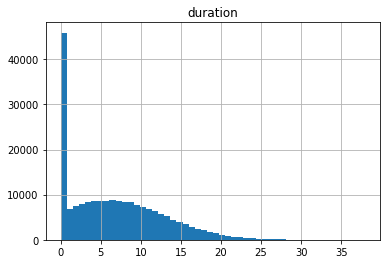

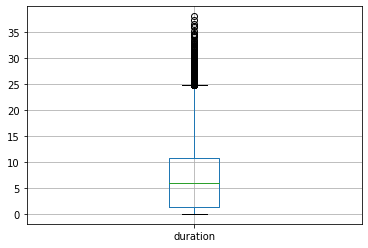

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


In [8]:
calls.hist('duration', bins=50)   
plt.show()
calls.boxplot('duration')
plt.show()
print(calls['duration'].describe())

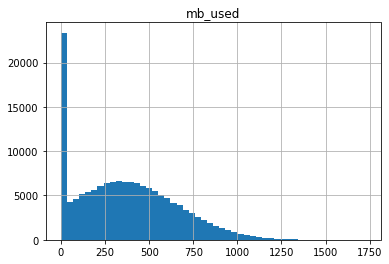

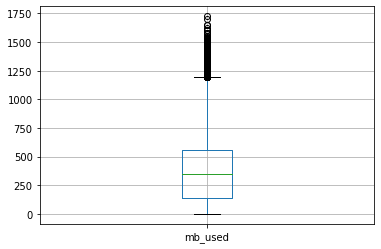

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


In [9]:
internet.hist('mb_used', bins=50)     
plt.show()
internet.boxplot('mb_used')
plt.show()
print(internet['mb_used'].describe())

Как видно из гистограмм данные имеют нормальное распределение и вполне правдаподобные значение (наличие "артуфактов" маловероятно), но к сожалению также имеется очень большое количество нулевых значений. Появление таких нулевых значений в столбце с продолжительностью звонков объясняется тем, что в данных содержатся сведения о пропущенных звонках, а пропуски в столбце об использованном трафике возникли предположительно из-за неудачных попыток выйти в сеть. Все эти нулевые значения имеют совершенно естественную природу и вправе существовать. Встает вопрос об удалении таких значений. Я считаю, что удаление совершенно нецелесообразно по многим причинам, прежде всего в этом просто нет необходимости. При дальнейшей обработке, исследовании, анализе и проверке гипотез нулевые значения данных столбцов не окажут никакого негативного влияния, поэтому их можно оставить.

### Подсчет для каждого пользователя:

Преобразуем данные и подсчитаем важные значения о количестве используемых телекоммуникационных ресурсов каждым пользователем в течении месяца:

Для начала добавим столбцы с номерами месяца для звонков, сообщений и выходов в Интернет, в целях последующей агрегации

In [10]:
calls['month'] = calls['call_date'].dt.month             
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

#### Количества сделанных звонков и израсходованных минут

In [11]:
calls['duration'] = np.ceil(calls['duration'])
calls_stat = calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_stat.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
calls_stat.head()              

,user_id,month,calls_count,calls_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


#### Количества отправленных сообщений

In [12]:
messages_stat = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages_stat.columns = ['user_id', 'month', 'messages_count']
messages_stat.head()                                            

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объема израсходованного Интернет-трафика

In [13]:
internet_stat = internet.groupby(['user_id', 'month']).agg({'id':'count', 'mb_used':'sum'}).reset_index()
internet_stat.columns = ['user_id', 'month', 'session_count', 'mb_used_sum']
internet_stat.head()              

,user_id,month,session_count,mb_used_sum
0,1000,5,5,2253.49
1,1000,6,49,23233.77
2,1000,7,29,14003.64
3,1000,8,29,14055.93
4,1000,9,27,14568.91


#### Прибыли получаемой от пользователя за месяц
    
Первоначально объединим все имеющиеся датафрэйми в один общий, для удобства вычислений:

In [14]:
df = calls_stat.merge(messages_stat, on=['user_id', 'month'], how='outer')
df = df.merge(internet_stat, on=['user_id', 'month'], how='outer')
df = df.merge(users, on='user_id', how='left')
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,calls_count,calls_duration,messages_count,session_count,mb_used_sum,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,5.0,2253.49,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,49.0,23233.77,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,29.0,14003.64,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,29.0,14055.93,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,27.0,14568.91,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Теперь у нас имеется один общий датафрэм который объединяет все необходимые седения. Произведем небольщую доработку значений хранящихся в столбцах

In [15]:
df = df.fillna(0)                                                

Заполнение пропусков нулями подходит потому, что во-первых это позволяет произвести расчет ежемесячной прибыли с каждого пользователя без возникновения ошибок, при том что нулевые значения не искажают данные, а во-вторых сам факт того, что абоненты не использовали доступные ресурсы тарифа, при замене на значение ноль, будет отражен при построении гистограм и использован при анализе данных.

Переведем значения представленные в Mb в значения в Gb. И округлим потраченных трафик и время продолжительности звонков до целых значений методом ceil, для последующего подсчета выручки получаемой с одного абонента в месяц по условиям оператора: 

In [16]:
df['mb_used_sum'] = np.ceil(df['mb_used_sum'] / 1024)  
df = df.rename(columns={'mb_used_sum':'gb_used_sum'})
df[['calls_duration', 'gb_used_sum', 'calls_count', 'messages_count', 'session_count']] = df[['calls_duration', 'gb_used_sum', 'calls_count', 'messages_count', 'session_count']].astype('int')
df.head()

,user_id,month,calls_count,calls_duration,messages_count,session_count,gb_used_sum,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,5,3,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,49,23,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,29,14,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,29,14,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,27,15,52,2018-12-31,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [17]:
def income_per_month(row):           #функция по расчету помесячной выручки с каждого пользователя по условиям тарифа
    income = 0
    srow = [row['calls_duration'], row['messages_count'], row['gb_used_sum']]
    if row['tariff'] == 'ultra':
        income = 1950
        tariff_u = [3000, 1000, 30]
        price_u = [1, 1, 150]
        for i in range(3):
            if srow[i] >= tariff_u[i]:
                income += (srow[i] - tariff_u[i]) * price_u[i]
    else:
        income = 550
        tariff_s = [500, 50, 15]
        price_s = [3, 3, 200]
        for i in range(3):
            if srow[i] >= tariff_s[i]:
                income += (srow[i] - tariff_s[i]) * price_s[i]
    return income

df['income'] = df.apply(income_per_month, axis=1)
df = df.sort_values(['user_id', 'month']).reset_index(drop=True)
df.head()

,user_id,month,calls_count,calls_duration,messages_count,session_count,gb_used_sum,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,5,3,52,2018-12-31,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,49,23,52,2018-12-31,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,29,14,52,2018-12-31,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,29,14,52,2018-12-31,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,27,15,52,2018-12-31,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


### Вывод
Предобработка всех данных завершена, теперь все данные пригодны для анализа, а так же для выполнения самого важного пункта проекта - проверки гипотез.

## Анализ данных
Постараемся описать поведение клиентов оператора, проанализировав количества минут разговора, число сообщений и какой объём интернет-трафика используется пользователям каждого тарифа в месяц.

Распределение данных messages_count:


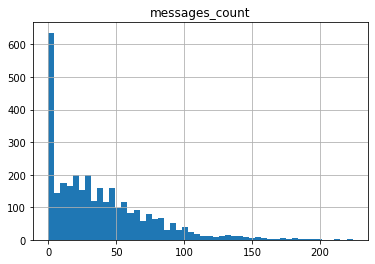

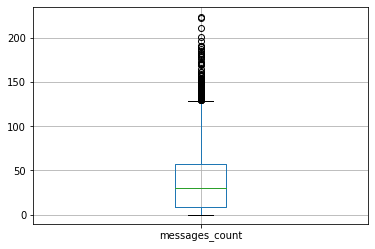

Дисперсия: 1306.294876297654
count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages_count, dtype: float64

Распределение данных gb_used_sum:


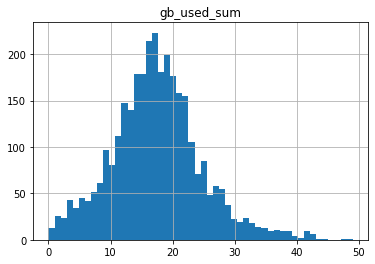

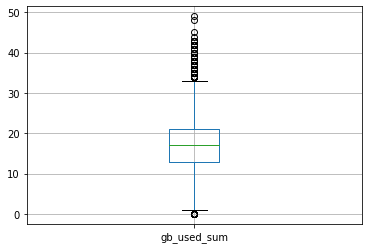

Дисперсия: 54.751604484735225
count    3214.000000
mean       17.299004
std         7.400584
min         0.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: gb_used_sum, dtype: float64

Распределение данных calls_duration:


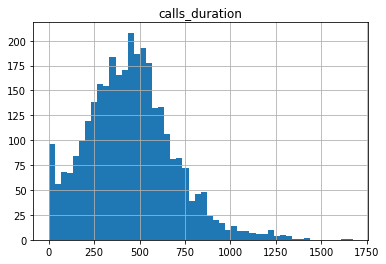

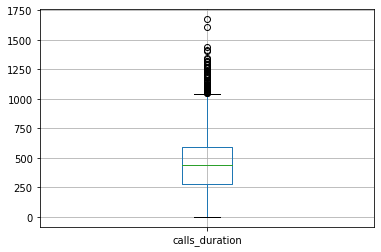

Дисперсия: 58502.22971073195
count    3214.000000
mean      451.244866
std       241.909978
min         0.000000
25%       282.000000
50%       443.000000
75%       589.000000
max      1673.000000
Name: calls_duration, dtype: float64



In [18]:
for i in ['messages_count', 'gb_used_sum', 'calls_duration']:
    print(f'Распределение данных {i}:')
    df.hist(i, bins=50)
    plt.show()
    df.boxplot(i)
    plt.show()
    print('Дисперсия:', np.var(df[i]))
    print(df[i].describe())
    print()

Проанализируем показатели дохода, и определим пользователи какого тарифа чаще выходя за пределы установленного лимита:

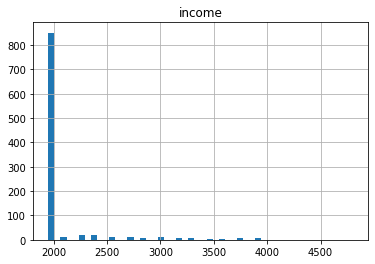

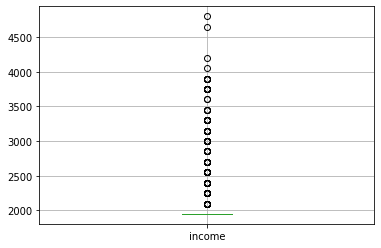

Дисперсия: 141373.07325620347
count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64


In [19]:
income_u = df.query('tariff == "ultra"')
income_u.hist('income', bins=50)
plt.show()
income_u.boxplot('income')
plt.show()
print('Дисперсия:', np.var(income_u['income']))
print(income_u['income'].describe())

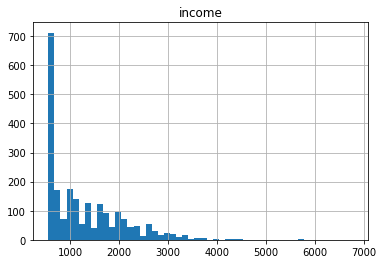

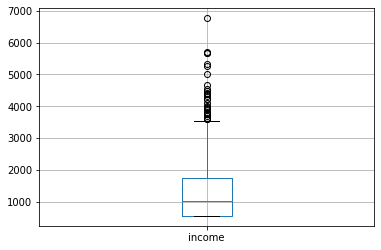

Дисперсия: 669485.2209234245
count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: income, dtype: float64


In [20]:
income_s = df.query('tariff == "smart"')
income_s.hist('income', bins=50)
plt.show()
income_s.boxplot('income')
plt.show()
print('Дисперсия:', np.var(income_s['income']))
print(income_s['income'].describe())

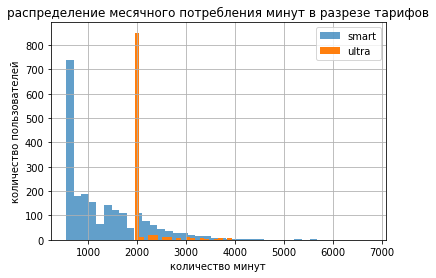

In [21]:
df.query('tariff == "smart"')['income'].hist(bins=40, label='smart', alpha=0.7)
df.query('tariff == "ultra"')['income'].hist(bins=30, label='ultra')
plt.legend(loc='upper right')
plt.title('распределение месячного потребления минут в разрезе тарифов')
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.show()

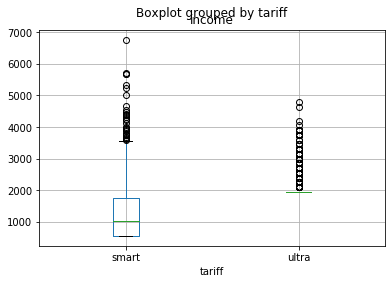

In [22]:
df.boxplot(column='income', by='tariff')
plt.show()

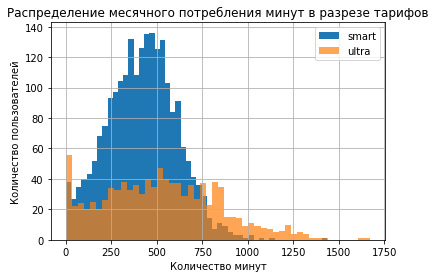

In [23]:
df.query('tariff == "smart"')['calls_duration'].hist(bins=50, label='smart')
df.query('tariff == "ultra"')['calls_duration'].hist(bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Распределение месячного потребления минут в разрезе тарифов')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
plt.show()

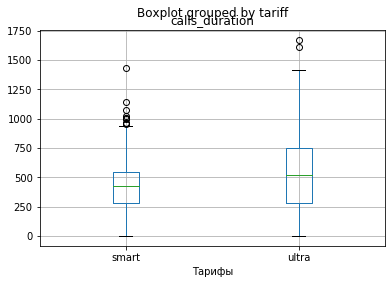

In [32]:
df.boxplot(column='calls_duration', by='tariff')
plt.xlabel('Тарифы')
plt.show()

###  Вывод
Исследовательский анализ данных произведен. По итогам можно сказать, что все наборы данных имеют распределение близкое к нормальному. Больше всего к нормальному расределению тяготеет выборка из данных по использованному Интернет-трафику, даже почти симметрична. Распределение данных по звонкам также очень сильно напоминает нормальное распределение, за исключением небольшого смещения вправо и наличия относительно небольшого,но выделяющего количества нулевых значений. А вот данные по количеству сообщений отправленных пользователями за месяц, прямо кишат большим количеством нулевых значений. Подводя итог, хочется сказать, что интересы пользователей растут в направлении Интернет ресурсов, отсюда и возникают нулевые значения в данных по сообщениям и звонкам, люди просто перестают использовать данный вид связи, поскольку Интернет более идобен и заменяет функции звонков и сообщений. Этот фактор просто необходимо учитывать при дальнейшем создании новых тарифов.

## Проверка гипотез

Данный проект имеет главную цель - это проверка важных гипотез, которые важны для последующего формирования ценовой политики данного оператора.

### Проверка гипотезы: средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

Для оператора важно знать различается ли средняя выручка получаемая от пользователей разных тарифов. Используя статистический метод анализа данных, проверим имеет ли место быть данная теория либо ее стоит отвергнуть.

Прежде всего нужно строго сформулировать нулевую и альтернативную ей теории:

Нулевая теория(Н0) - средняя выручка пользователей различных тарифов **равна**

Альтернативная теория(Н1) - средняя выручка с различных тарифов **не равна**

In [25]:
array_u = df.query('tariff == "ultra"')['income']
array_s = df.query('tariff == "smart"')['income']

alpha = 0.05

results = st.ttest_ind(array_u, array_s)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу.


По итогу проверки нулевой гипотезы получено очень маленькое р-значение, в данном случае даже не стоит вопрос об изменении уровня статистической значимости. По этому нулевая однозначно отвергнута. Из чего можно сделать вывод, что средний доход в месяц от пользователей разных тарифов несомненно различается. Такой вывод очень предсказуем и логичен, поскольку сравниваемые тарифи очень отличаются и предназначены для различной аудитории, а потому и доход от них индивидуален.

### Проверка гипотезы: средняя выручка пользователей из Москвы отличаются от выручки пользователей из других регионов

Теперь необходимо оценить не менее важный вопрос об отличии средней выручки пользователей из Москвы и пользователей других регионов. Аналогичным методом, используемым для проверки первой гипозезы, ответим на поставленный вопрос.

Сформулируем теории:

Нулевая теория(Н0) - средняя выручка пользователей Москвы и регионов **равна**

Альтернативная теория(Н1) - средняя выручка пользователей Москвы и регионов **не равна**

In [26]:
array_M = df.query('city == "Москва"')['income']
array_o = df.query('city != "Москва"')['income']

alpha = 0.05

results = st.ttest_ind(array_M, array_o)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение: 0.5440152911670223
Не удалось отвергнуть нулевую гипотезу.


Нулевая гипотеза однозначно не может быть отвергнута, ввиду большого р-значения. А это означает, что с высокой долей вероятности средный доход приносимый абонентами Московской зоны и пользователями из регионов не так уж и сильно отличается.

### Вывод

В настоящем шаге исследовательского проекта, с помощью статистических методов анализа данных, было проверено две важные гипотезы, первая из которых не отвергнута и имеет место быть, а вторая теория с достаточно высокой вероятностью была отвергнута.

## Общий вывод

Проделав проектную работу в курсе статисического анализа данных, мне удалось закрепить и усвоить знания полученные в данном курсе. Тариф smart являеется более прибыльным для телеком-компании Мегалайн. Потому, что его абоненты значительно чаще расходуют тарифный лимит и преобретают услуги сверх тарифа по очень выгодным для компании ценам. Таким образом, предоставляя меньшее количество услуг компания получает больше прибыли. Статисический анализ невероятно важен, он позволяет делать предсказания по ограниченному количеству данных с той или иной степенью вероятности. А прогнозирование и подтверждение гипотез - это то, ради чего и проводится анализ данных.